---
# **データサイエンス基礎　第3回課題**
## **【フェルミ推定】日本国内における小学校に必要な教員数の概算**
---
### 1. 概算式の導入
(1)　文部科学省の統計より，[昭和30年(1955年)から令和4年(2023年)までの小学生の児童数の推移 [1]](https://www.mext.go.jp/content/20230417-mxt_chousa01-000029229-4.xlsx)が公開されている．  
(2)　また，文部科学省より[小学校の1クラス（学級）当たりの人数 [2]](https://www.mext.go.jp/b_menu/activity/detail/2021/20210331.html)は最大で<u> **35人** </u>とすることが決定されている．  
(3)　1学級につき，必要な教員は<u> **1人** </u>であると仮定する．  
　したがって，これらの条件から，その年度に必要な教員数を以下のようにして概算した．
$$ 概算式：　必要な教員数 = \lceil 児童数÷1学級当たりの児童数 \rceil × 1学級当たりの教員数 $$
$$ \longleftrightarrow 必要な教員数 = \lceil 児童数÷35 \rceil × 1 $$
### 2. 概算プログラムおよび概算値と実数値の比較

,年度,教員数,教員数（概算）,絶対誤差 [万人],相対誤差 [%]
0,1955,340572,350485,0.9913,2.910691
1,1960,360660,359734,-0.0926,-0.256752
2,1965,345118,279301,-6.5817,-19.070869
3,1970,367941,271243,-9.6698,-26.280844
4,1975,415071,296139,-11.8932,-28.653411
5,1980,467953,337903,-13.0050,-27.791253
6,1985,461256,317011,-14.4245,-31.272222
7,1990,444218,267809,-17.6409,-39.712258
8,1995,430958,239150,-19.1808,-44.507353
9,2000,407598,210460,-19.7138,-48.365792


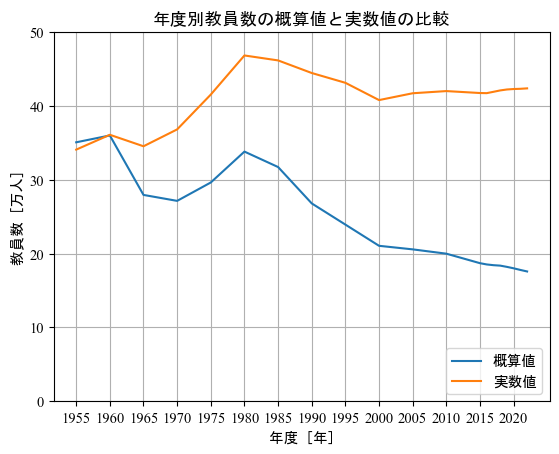

In [50]:
# 基本ライブラリの読み込み
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

# CSVファイルをデータフレームにする
df = pd.read_csv('データベース.csv')

# フェルミ推定をする上での仮定
student_per_class = 35      # 1学級当たりの児童数 
teacher_per_class = 1       # 1学級当たりの教員数

table_df = pd.DataFrame()   # 表にするデータを格納するデータフレーム
classes_list = []           # 年度別学級数のリスト
teacher_list = []           # 年度別教員数のリスト
absolute_errors_list = []   # 絶対誤差のリスト
percentage_errors_list = [] # 相対誤差のリスト

# 年度ごとに概算したデータをリストに追加する
for index, row in df.iterrows():
    # 最大35人の学級を仮定して，総児童数に対して，何学級あればよいか計算する
    classes = math.ceil(row['児童数'] / student_per_class)
    classes_list.append(classes)
    # 上式で計算した学級数に対して必要な教員数を計算する
    teacher = classes * teacher_per_class
    teacher_list.append(teacher)

    # 概算した教員数と実際の教員数の絶対誤差と相対誤差を計算する
    absolute_error = (teacher - row['教員数'])
    absolute_errors_list.append(absolute_error/10000)               # [万人]単位とする
    percentage_errors_list.append(absolute_error/row['教員数']*100) # 単位は[%]

# リストをデータフレームに追加
df['クラス数'] = classes_list
df['教員数（概算）'] = teacher_list
table_df['年度'] = df['年度']
table_df['教員数'] = df['教員数']
table_df['教員数（概算）'] = df['教員数（概算）']
table_df['絶対誤差 [万人]'] = absolute_errors_list
table_df['相対誤差 [%]'] = percentage_errors_list

# print(df)
# df.to_csv('データ.csv', mode='w')
display(table_df)

# 教員数の概算値と実数値を比較するグラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams['font.size'] = 10.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(df['年度'], df['教員数（概算）']/10000, label='概算値')
plt.plot(df['年度'], df['教員数']/10000, label='実数値')
plt.title('年度別教員数の概算値と実数値の比較', fontname="MS Gothic")
plt.xticks(
    ticks=[1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020],
    labels=['1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020'], 
    fontname='Times New Roman'
)
plt.yticks(
    ticks=[0, 10, 20, 30, 40, 50],
    labels=['0', '10', '20', '30', '40', '50'],
    fontname='Times New Roman'
)
ax.set_xlabel('年度 [年]', fontname="MS Gothic", )
ax.set_ylabel('教員数 [万人]', fontname="MS Gothic")
plt.grid()
plt.legend(prop={'family': 'MS Gothic', 'size': 'medium'}, loc='lower right')
plt.show()

### 3. 概算結果に対する考察および概算式の修正  
　上記の表およびグラフより，各年度における教員数の概算値と実数値は，序盤（1955年から1960年まで）は概ね一致していることが確認できる一方で，その後から現在にかけては誤差が拡大するという概算結果となってしまった．ただし，グラフが増減のパターンは概ね一致していることが確認できる．  
　今回は，小学生の児童数から教員数の概算を行ったため，教員数の概算値が児童数に比例するため，少子化に起因して児童数が減少するにつれて，教員数の概算値も減少する．この値と比較して，実際の教員数が2倍以上多いのにも関わらず，現代社会では[教員不足 [3]](https://www.mext.go.jp/content/20220128-mxt_kyoikujinzai01-000020293-1.pdf)が叫ばれており，概算値と現状のずれが感じられる．したがって，概算式を改良する必要があると考えられる．ただし，グラフの増減のパターンが概ね一致していることから，児童数をベースに教員数を概算するという行為は確からしいことが確認できる．  
　また，序盤の概算値は概ね正しく，年度が経つにつれて概算値と実数値の誤差が拡大していることから，年度$y$に比例する関数$f(y)=ky$を概算式に加算する必要があると考えられる．加えて，小学校には，児童の学級を担当する教員の他にも，校長や教頭，養護教諭なども存在し，これらの人数も実数値には含まれていると考えられるため，これに関する項も概算式に加算する必要があるといえる．校長，教頭，養護教諭は原則として学校につき1人以上も受ける必要があると[学校教育法第2章第28条 [4]](https://www.mext.go.jp/b_menu/hakusho/html/others/detail/1317990.htm)に記載がある．これより，$その他の教員=学校数×3$と仮定して加算する．また，その他学級を持たない教員も存在すると考えられるが，一般的に算出することが困難であるため無視する．  
　したがって，新たな概算式として次式のように書ける．
$$概算式：　必要な教員数 = \lceil 児童数÷1学級当たりの児童数 \rceil × 1学級当たりの教員数 + その他の教員数 + f(y)$$
$$ \longleftrightarrow 必要な教員数 = \lceil 児童数÷35 \rceil × 1 + 学校数×3 + ky$$  
### 4. 概算プログラムの修正

,年度,教員数,教員数（概算）,絶対誤差 [万人],相対誤差 [%]
0,1955,340572,431125,9.0553,26.588504
1,1960,360660,452808,9.2148,25.549825
2,1965,345118,382232,3.7114,10.754003
3,1970,367941,383113,1.5172,4.123487
4,1975,415071,420089,0.5018,1.208950
5,1980,467953,475238,0.7285,1.556780
6,1985,461256,467131,0.5875,1.273696
7,1990,444218,429790,-1.4428,-3.247955
8,1995,430958,412794,-1.8164,-4.214796
9,2000,407598,395278,-1.2320,-3.022586


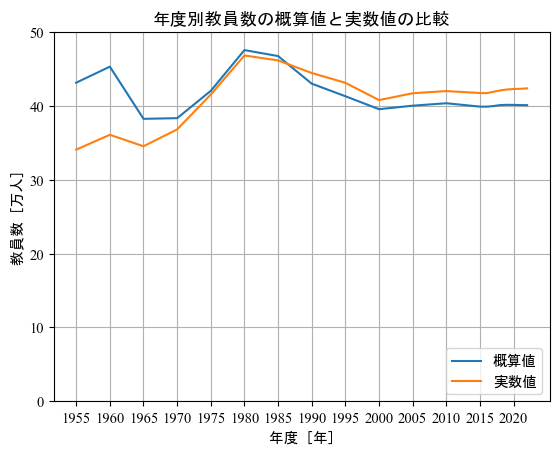

In [51]:
special_teacher = 3         # その他の教員数（校長，教頭，養護教諭など）
k = 2500                    # f(y) = ky における比例定数：k
base_year = 1955            # 経過年数の基準となる年度

table_df = pd.DataFrame()   # 表にするデータを格納するデータフレームの初期化
teacher_list = []           # 年度別教員数のリストの初期化
absolute_errors_list = []   # 絶対誤差のリストの初期化
percentage_errors_list = [] # 相対誤差のリストの初期化

# 年度ごとに概算したデータをリストに追加する
for index, row in df.iterrows():
    # 新しい概算式にしたがって計算する
    teacher = row['教員数（概算）'] + row['学校数'] * special_teacher + k * (row['年度'] - base_year)
    teacher_list.append(teacher)

    # 概算した教員数と実際の教員数の絶対誤差と相対誤差を計算する
    absolute_error = (teacher - row['教員数'])
    absolute_errors_list.append(absolute_error/10000)               # [万人]単位とする
    percentage_errors_list.append(absolute_error/row['教員数']*100) # 単位は[%]

# リストをデータフレームに追加
df['クラス数'] = classes_list
df['教員数（概算）'] = teacher_list
table_df['年度'] = df['年度']
table_df['教員数'] = df['教員数']
table_df['教員数（概算）'] = df['教員数（概算）']
table_df['絶対誤差 [万人]'] = absolute_errors_list
table_df['相対誤差 [%]'] = percentage_errors_list

# print(df)
# df.to_csv('データ.csv', mode='w')
display(table_df)

# 教員数の概算値と実数値を比較するグラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams['font.size'] = 10.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(df['年度'], df['教員数（概算）']/10000, label='概算値')
plt.plot(df['年度'], df['教員数']/10000, label='実数値')
plt.title('年度別教員数の概算値と実数値の比較', fontname="MS Gothic")
plt.xticks(
    ticks=[1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020],
    labels=['1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020'], 
    fontname='Times New Roman'
)
plt.yticks(
    ticks=[0, 10, 20, 30, 40, 50],
    labels=['0', '10', '20', '30', '40', '50'],
    fontname='Times New Roman'
)
ax.set_xlabel('年度 [年]', fontname="MS Gothic", )
ax.set_ylabel('教員数 [万人]', fontname="MS Gothic")
plt.grid()
plt.legend(prop={'family': 'MS Gothic', 'size': 'medium'}, loc='lower right')
plt.show()

### 5. 修正結果に対する考察
　ここで，$y$は1955年からの経過年数とし，$k$は比例定数であるが，$k=2500$とすると実際の教員数の推移に近い概算結果が得られることが分かった．これは，その他の要因で1年当たりに増加する教員数が2500人程度ずつ増加することを意味する．この増加に対する要因は様々なことが考えられ，限定して概算式に明記することは難しいが，教員不足に対する様々な対策の結果（非正規の教員や外部指導員，副教科専門の教員などの雇用）や，1学級当たりの児童数が仮定の35人より少なく，さらにその数が年々減少していることなどが考えられる．実際に，自身が小学生だった頃（2009年～2014年）の1学級当たりの児童数が30人弱であったことからも，概算式において，各年度における1学級当たりの児童数を定数として扱ったことが，概算の結果が大きく異なってしまった最大の要因であるといえる．  
　逆に，概算式を変更する前は，1955年から1960年までの概算は概ね一致していたが，概算式を変更したことによって，実際よりも多く見積もられてしまった．これも1学級当たりの児童数を35人と仮定したことに起因すると考えられる．公式名データではないが，昔（1900年代後半）は1学級40人近くであったと聞くことが多いため，やはり概算式において各年度における1学級当たりの児童数を見直す必要があるといえる．しかし，年度に対する1学級当たりの児童数の変化は人為的決定に依存し，単調減少などの規則性も見られないため，予測することが難しく，また今後も教育体系の変化によってこの値が不規則に変動する可能性があることから，予測は困難であると判断した．  
　したがって，今後必要になる教員数を決定するための概算式にも次式を用いる．
$$ 概算式：　必要な教員数 = \lceil 児童数÷35 \rceil × 1 + 学校数×3 + 経過年数 × 2500$$     
### 6. 将来の日本における小学校に必要な教員数の概算
　課題における想定として，<u> **「あなたは日本の小学校教育の今後の目指す方向を検討するチームの一員です」** </u>とあったため，概算結果とその考察のほかに，今後の日本に必要であると考えられる教員数（2040年度まで）を概算する．

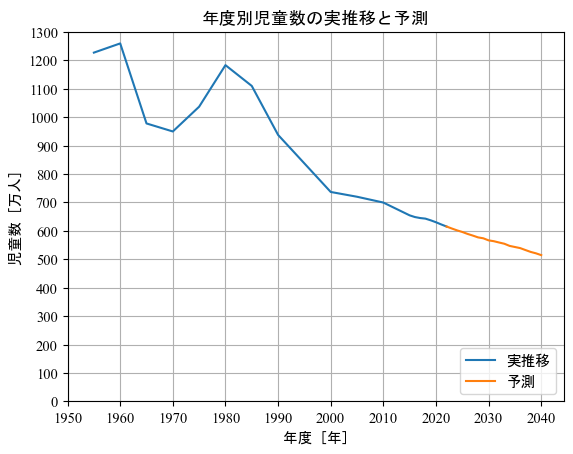

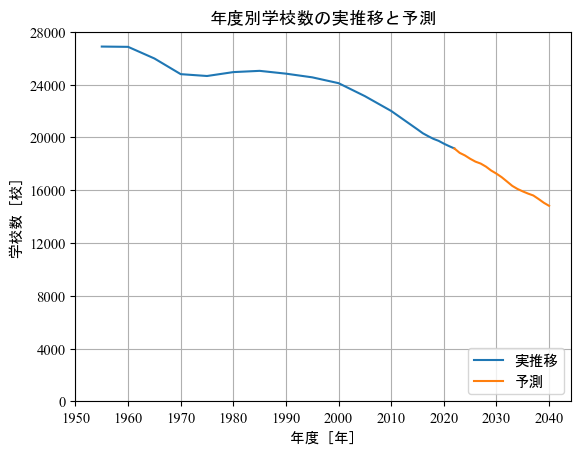

In [52]:
year_list = [2022]                          # 年度のリスト
future_students = df.at[19, '児童数']       # 各年度の児童数の予測値
future_schools = df.at[19, '学校数']        # 各年度の学校数の予測値
students_list = [future_students/10000]    # 児童数の予測値のリスト [万人]
schools_list = [future_schools]            # 学校数の予測値のリスト [校]

# 1年当たりに減少する児童数（2000年度から2022年度の平均減少量）
children_decrease = (df.at[9, '児童数'] - df.at[19, '児童数']) / (2022 - 2000)
# 1年当たりに減少する学校数（2000年度から2022年度の平均減少量）
schools_decrease = (df.at[9, '学校数'] - df.at[19, '学校数']) / (2022 - 2000)

for year in range(2023, 2041):
    year_list.append(year)
    # 2000年度から2022年度の児童数の平均減少量±50%の範囲でランダムに減少すると仮定
    future_students -= children_decrease + random.uniform(children_decrease*-0.5, children_decrease*0.5)
    students_list.append(math.ceil(future_students)/10000)
    # 2000年度から2022年度の学校数の平均減少量±50%の範囲でランダムに減少すると仮定
    future_schools -= schools_decrease + random.uniform(schools_decrease*-0.5, schools_decrease*0.5)
    schools_list.append(math.ceil(future_schools))

# 児童数の推移と今後の予測を示すグラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams['font.size'] = 10.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(df['年度'], df['児童数']/10000, label='実推移')
plt.plot(year_list, students_list, label='予測')
plt.title('年度別児童数の実推移と予測', fontname="MS Gothic")
plt.xticks(
    ticks=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030, 2040],
    labels=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020', '2030', '2040'], 
    fontname='Times New Roman'
)
plt.yticks(
    ticks=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300],
    labels=['0', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000', '1100', '1200', '1300'],
    fontname='Times New Roman'
)
ax.set_xlabel('年度 [年]', fontname="MS Gothic", )
ax.set_ylabel('児童数 [万人]', fontname="MS Gothic")
plt.legend(prop={'family': 'MS Gothic', 'size': 'medium'}, loc='lower right')
plt.grid()
plt.show()

# 学校数の推移と今後の予測を示すグラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams['font.size'] = 10.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(df['年度'], df['学校数'], label='実推移')
plt.plot(year_list, schools_list, label='予測')
plt.title('年度別学校数の実推移と予測', fontname="MS Gothic")
plt.xticks(
    ticks=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030, 2040],
    labels=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020', '2030', '2040'], 
    fontname='Times New Roman'
)
plt.yticks(
    ticks=[0, 4000, 8000, 12000, 16000, 20000, 24000, 28000],
    labels=['0', '4000', '8000', '12000', '16000', '20000', '24000', '28000'],
    fontname='Times New Roman'
)
ax.set_xlabel('年度 [年]', fontname="MS Gothic", )
ax.set_ylabel('学校数 [校]', fontname="MS Gothic")
plt.legend(prop={'family': 'MS Gothic', 'size': 'medium'}, loc='lower right')
plt.grid()
plt.show()

　児童数の推移を見ると，一時的な増減は確認できる一方で，全体としては減少傾向にあることが明らかであると分かる．減少の傾きに注目すれば，2000年度から傾きが小さくなったまま，ほぼ一定であることが確認でき，これは2000年から現在にかけて児童数の減少の速度がほぼ一定であることを意味する．そこで，現在の児童数の減少速度は均衡状態となったものと仮定し，今後2040年までの児童数がこのままのペースで減少する状況を考えた．具体的には，次式のように表すように，2000年度から2022年度の児童数の減少量の平均値の±50[%]の範囲でランダムに児童数が減少することを想定した．
$$ 仮定：　児童数の減少速度 = \frac{2000年度児童数 - 2022年度児童数}{経過年数：22年} ≓ 5.5 [万人/年] ± 50 [％] $$  
　学校数に関しても，2000年から現在にかけて概ね一定のペースで減少しているため，今後の学校数の予測方法も上式と同様の式を仮定した．　
$$ 仮定：　学校数の減少速度 = \frac{2000年度学校数 - 2022年度学校数}{経過年数：22年} ≓ 200 [校/年] ± 50 [％] $$  

【2022年度教員数との差】
・2025年度（来年度）：-345 [人] (-0.09 [%])
・2040年度　　　　　：3183 [人] (0.79 [%])


,年度,児童数 [万人],学校数 [校],教員数（概算） [万人]
0,2023,608.1230,18829,40.0237
1,2024,601.5231,18633,40.0263
2,2025,595.8732,18380,40.0390
3,2026,589.0553,18163,40.0291
4,2027,583.1708,18016,40.0669
5,2028,576.8299,17785,40.0664
6,2029,573.5705,17486,40.1336
7,2030,566.3584,17251,40.1070
8,2031,563.3646,16980,40.1902
9,2032,558.7742,16656,40.2118


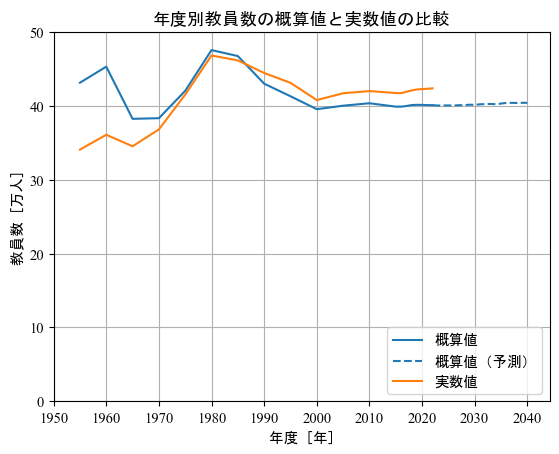

In [53]:
prediction_df = pd.DataFrame()                      # 表にするデータを格納するデータフレーム
graph_df = pd.DataFrame()                           # グラフにするデータを格納するデータフレーム
teacher_list = [df.at[19, '教員数（概算）']/10000]  # 年度別教員数のリストの初期化

prediction_df['年度'] = year_list[1:19]
prediction_df['児童数 [万人]'] = students_list[1:19]
prediction_df['学校数 [校]'] = schools_list[1:19]

# 年度ごとに概算したデータをリストに追加する
for index, row in prediction_df.iterrows():
    # 新しい概算式にしたがって計算する
    classes = math.ceil(row['児童数 [万人]']*10000 / student_per_class)
    teacher = classes * teacher_per_class + row['学校数 [校]'] * special_teacher + k * (row['年度'] - base_year)
    teacher_list.append(teacher/10000)

# リストをデータフレームに追加
prediction_df['教員数（概算） [万人]'] = teacher_list[1:19]
graph_df['年度'] = year_list
graph_df['教員数（概算）'] = teacher_list

print('【2022年度教員数との差】')
print('・2025年度（来年度）：{} [人] ({:.2f} [%])'.format(int(prediction_df.at[2, '教員数（概算） [万人]']*10000 - df.at[19, '教員数（概算）']), int(prediction_df.at[2, '教員数（概算） [万人]']*10000 - df.at[19, '教員数（概算）']) / df.at[19, '教員数（概算）'] * 100))
print('・2040年度　　　　　：{} [人] ({:.2f} [%])'.format(int(prediction_df.at[17, '教員数（概算） [万人]']*10000 - df.at[19, '教員数（概算）']), int(prediction_df.at[17, '教員数（概算） [万人]']*10000 - df.at[19, '教員数（概算）']) / df.at[19, '教員数（概算）'] * 100))
# print(df)
# df.to_csv('データ.csv', mode='w')
display(prediction_df)

# 教員数の概算値と実数値を比較するグラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams['font.size'] = 10.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(df['年度'], df['教員数（概算）']/10000, label='概算値')
plt.plot(graph_df['年度'], graph_df['教員数（概算）'], label='概算値（予測）', linestyle='--', color='#2379b5')
plt.plot(df['年度'], df['教員数']/10000, label='実数値')
plt.title('年度別教員数の概算値と実数値の比較', fontname="MS Gothic")
plt.xticks(
    ticks=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030, 2040],
    labels=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020', '2030', '2040'], 
    fontname='Times New Roman'
)
plt.yticks(
    ticks=[0, 10, 20, 30, 40, 50],
    labels=['0', '10', '20', '30', '40', '50'],
    fontname='Times New Roman'
)
ax.set_xlabel('年度 [年]', fontname="MS Gothic", )
ax.set_ylabel('教員数 [万人]', fontname="MS Gothic")
plt.grid()
plt.legend(prop={'family': 'MS Gothic', 'size': 'medium'}, loc='lower right')
plt.show()

　したがって，来年度の2025年度には教員数はおよそ40.0万人となり，2040年度には40.4万人というように微増することが予測された．2022年度における教員数との差を考えると，来年度の2025年度で-345人（-0.09%），2040年度には3183人（0.79%）となることが予測された．  
　教員数の推移がほぼ一定（微増）するという予測結果となった．これは，児童数や学校数が一定のペースで減少している一方で，年度が経つにつれて教員数が増加する項$ky$の影響との拮抗の結果であるが，児童数が減少しても，教員一人当たりの児童数すなわち1学級当たりの児童数が減少することを意味すると考えられる．一方で，現在の日本の社会の傾向として，働き方改革の一環として，1学級を週替わりなどで複数の担任で持ち合う複数担任制の導入を検討したり，将来の労働人口の技術力向上のために，情報などの専門科目の必修化を目指したりしてることから，これらの実現のために新たな教員が必要となると考えられる．したがって，定性的な予測ではあるが，新たな教育体制の実現のために，新たな要因の教員が必要となり，児童数は減少する一方で，教員数は概算の通りほぼ一定に保たれるか微増すると考えられる．  
　これより，フェルミ推定によって，妥当な教員数が概算できたことが確認できる．
### 7. 結論
#### 【フェルミ推定による将来の日本において必要な教員数】
- 2025年度：40.0万人
- 2040年度：40.3万人
- 教員数の推移は，ほぼ一定でわずかに増加するという予測
### 参考文献
[1] 文部科学省，"小学校統計情報"，[https://www.mext.go.jp/content/20230417-mxt_chousa01-000029229-4.xlsx](https://www.mext.go.jp/content/20230417-mxt_chousa01-000029229-4.xlsx)，（参照2024-5-1）  
[2] 文部科学省，"小学校における35人学級の実現／約40年ぶりの学級編制の標準の一律引下げ"，[https://www.mext.go.jp/b_menu/activity/detail/2021/20210331.html](https://www.mext.go.jp/b_menu/activity/detail/2021/20210331.html)，（参照2024-5-1）  
[3] 文部科学省，"「教師不足」に関する実態調査"，[https://www.mext.go.jp/content/20220128-mxt_kyoikujinzai01-000020293-1.pdf](https://www.mext.go.jp/content/20220128-mxt_kyoikujinzai01-000020293-1.pdf)，（参照2024-5-1）  
[4] 文部科学省，"学校教育法（昭和二十二年三月二十九日法律第二十六号）"，[https://www.mext.go.jp/b_menu/hakusho/html/others/detail/1317990.htm](https://www.mext.go.jp/b_menu/hakusho/html/others/detail/1317990.htm)，（参照2024-5-1）  
### 感想
　フェルミ推定によって，実数値と等しいオーダの概算ができることが分かった．一方で，実数値とほぼ同じ値を概算することは難しいと分かった．また，フェルミ推定を用いるような，多くのパラメータに依存する数量の変化を概算した場合は，その数値の妥当性について定量的に考察することも難しいため，評価が難しいことが分かった．言い換えれば，定量的に考察可能で，評価しやすい対象に関しては，精度良く算出できる可能性があるため，フェルミ推定による概算をするまでもないことが分かった．